In [1]:
import numpy as np
import pandas as pd
import os
import sys
import shutil
from datetime import datetime
import requests
from requests.exceptions import HTTPError
from requests.exceptions import ConnectionError
from bs4 import BeautifulSoup
from random import randint
from time import sleep

import matplotlib.pyplot as plt

In [2]:
# Begin the timer for the script processing
startTimeScript = datetime.now()

# Set up the verbose and debug flags to print detailed messages for debugging (setting True will activate!)
verbose = True
debug = False

# Set up the executeDownload flag to download files (setting True will download!)
executeDownload = False

In [3]:
def access_url(url):
    # Creating an html document from the URL
    uastring = "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:94.0) Gecko/20100101 Firefox/94.0"
    headers={'User-Agent': uastring}
    # Adding random wait time so we do not hammer the website needlessly
#     waitTime = randint(2,5)
    waitTime=1
    print("Waiting " + str(waitTime) + " seconds to retrieve the next URL.")
    sleep(waitTime)
    try:
        s = requests.Session()
        resp = s.get(url, headers=headers)
        if (debug): print(resp.text)
    except HTTPError as e:
        print('The server could not serve up the web page!')
        sys.exit("Script processing cannot continue!!!")
    except ConnectionError as e:
        print('The server could not be reached due to connection issues!')
        sys.exit("Script processing cannot continue!!!")

    if (resp.status_code==requests.codes.ok):
        print('Successfully accessed the web page: ' + url)
        bsoup_obj = BeautifulSoup(resp.text, 'lxml')
        return(bsoup_obj)

In [4]:
def download_to_local(doc_path):
    # Adding random wait time so we do not hammer the website needlessly
#     waitTime = randint(2,5)
    waitTime=1
    print("Waiting " + str(waitTime) + " seconds to retrieve " + doc_path)
    sleep(waitTime)
    local_file = doc_path.split('/')[-1]
    if (os.path.isfile(local_file) == False):
        with requests.get(doc_path, stream=True) as r:
            with open(local_file, 'wb') as f:
                shutil.copyfileobj(r.raw, f)
        print('Downladed file:', local_file, '\n')
    else:
        print('Skipped existing file:', local_file, '\n')

## Web Scraping

In [5]:
# Specifying the URL of desired web page to be scrapped
starting_url = "https://proceedings.neurips.cc/paper/2021"
website_url = "https://proceedings.neurips.cc"

In [6]:
# Access and test the starting URL
web_page = access_url(starting_url)

# Gather all document links from the starting URL (Two Levels)
collection = web_page.find_all('li')

# Delete the first two `li` element as they are not the paper items we need
collection.pop(0)
collection.pop(0)

print('Number of items collected:', len(collection))

Waiting 1 seconds to retrieve the next URL.
Successfully accessed the web page: https://proceedings.neurips.cc/paper/2021
Number of items collected: 2334


In [7]:
i = 0
for item in collection:
    if debug: print(item)
    doc_title = item.a.string
    authors = item.i.string
    doc_link = website_url + item.a['href']
    if verbose: print('Found abstract link at:', doc_link)
    if verbose: print('Found collaborating authors:', authors)

    doc_page = access_url(doc_link)
    artifact_list = doc_page.find_all('a', class_="btn")
    for artifact_item in artifact_list:
        if artifact_item.string == "Paper":
            doc_path = website_url + artifact_item['href']
            if verbose: print('Found paper at:', doc_path, '\n')
            if (executeDownload):
                download_to_local(doc_path)
    i = i + 1

print('Finished finding all available documents on the web pages!')
print('Number of abstracts processed:', i)

Found abstract link at: https://proceedings.neurips.cc/paper/2021/hash/000c076c390a4c357313fca29e390ece-Abstract.html
Found collaborating authors: Christoph Dann, Teodor Vanislavov Marinov, Mehryar Mohri, Julian Zimmert
Waiting 1 seconds to retrieve the next URL.
Successfully accessed the web page: https://proceedings.neurips.cc/paper/2021/hash/000c076c390a4c357313fca29e390ece-Abstract.html
Found paper at: https://proceedings.neurips.cc/paper/2021/file/000c076c390a4c357313fca29e390ece-Paper.pdf 

Found abstract link at: https://proceedings.neurips.cc/paper/2021/hash/003dd617c12d444ff9c80f717c3fa982-Abstract.html
Found collaborating authors: Ahmed Touati, Yann Ollivier
Waiting 1 seconds to retrieve the next URL.
Successfully accessed the web page: https://proceedings.neurips.cc/paper/2021/hash/003dd617c12d444ff9c80f717c3fa982-Abstract.html
Found paper at: https://proceedings.neurips.cc/paper/2021/file/003dd617c12d444ff9c80f717c3fa982-Paper.pdf 

Found abstract link at: https://proceedin

KeyboardInterrupt: 

In [8]:
print ('Total time for the script:',(datetime.now() - startTimeScript))

Total time for the script: 0:00:26.811215


In [9]:
titles_list=[item.a.string for item in collection]

In [10]:
titles_list

['Beyond Value-Function Gaps: Improved Instance-Dependent Regret Bounds for Episodic Reinforcement Learning',
 'Learning One Representation to Optimize All Rewards',
 'Matrix factorisation and the interpretation of geodesic distance',
 'UniDoc: Unified Pretraining Framework for Document Understanding',
 'Finding Discriminative Filters for Specific Degradations in Blind Super-Resolution',
 'Counterfactual Explanations Can Be Manipulated',
 'From Canonical Correlation Analysis to Self-supervised Graph Neural Networks',
 'BAST: Bayesian Additive Regression Spanning Trees for Complex Constrained Domain',
 'Hyperbolic Busemann Learning with Ideal Prototypes',
 'Backward-Compatible Prediction Updates: A Probabilistic Approach',
 'Truncated Marginal Neural Ratio Estimation',
 'ReAct: Out-of-distribution Detection With Rectified Activations',
 'Non-local Latent Relation Distillation for Self-Adaptive 3D Human Pose Estimation',
 'Fast Training of Neural Lumigraph Representations using Meta Lear

In [11]:
key_words=[' sequen', ' time', 'temporal', 'series', 'lstm', ' change', ' online', 'evolv', 'forecast', 
           'predict', 'real-time', 'realtime']
t_papers=[]
for title in titles_list:
    if np.array([k in title for k in key_words]).any():
        t_papers.append(title)

In [12]:
len(t_papers)/len(titles_list), t_papers

(0.014138817480719794,
 ['Deep inference of latent dynamics with spatio-temporal super-resolution using selective backpropagation through time',
  'Spatiotemporal Joint Filter Decomposition in 3D Convolutional Neural Networks',
  'Locally private online change point detection',
  'Machine learning structure preserving brackets for forecasting irreversible processes',
  'Bubblewrap: Online tiling and real-time flow prediction on neural manifolds',
  'Conformal Time-series Forecasting',
  'Making the most of your day: online learning for optimal allocation of time',
  'Optimal prediction of Markov chains with and without spectral gap',
  'What’s a good imputation to predict with missing values?',
  'Stochastic optimization under time drift: iterate averaging, step-decay schedules, and high probability guarantees',
  'Towards optimally abstaining from prediction with OOD test examples',
  'Predify: Augmenting deep neural networks with brain-inspired predictive coding dynamics',
  'SE(3)-e

## Plots by year

In [13]:
years=np.arange(1990,2022,1)

collection_year=[]

key_words=[' sequen', ' time', 'temporal', 'series', 'lstm', ' change', ' online', 'evolv', 'forecast', 
           'predict', 'real-time', 'realtime']
t_papers_years=[]

t_papers_count=[]

all_paper_count=[]

for year in years:
    # Specifying the URL of desired web page to be scrapped
    starting_url = "https://proceedings.neurips.cc/paper/"+str(year)
    website_url = "https://proceedings.neurips.cc"
    
    # Access and test the starting URL
    web_page = access_url(starting_url)

    # Gather all document links from the starting URL (Two Levels)
    collection = web_page.find_all('li')

    # Delete the first two `li` element as they are not the paper items we need
    collection.pop(0)
    collection.pop(0)

    print('Number of items collected:', len(collection))
    
    collection_year.append(collection)
    
    titles_list=[item.a.string for item in collection]
    
    t_papers=[]
    
    for title in titles_list:
        if np.array([k in title for k in key_words]).any():
            t_papers.append(title)
        
    t_papers_years.append(t_papers)
    t_papers_count.append(len(t_papers))
    all_paper_count.append(len(collection))

Waiting 1 seconds to retrieve the next URL.
Successfully accessed the web page: https://proceedings.neurips.cc/paper/1990
Number of items collected: 143
Waiting 1 seconds to retrieve the next URL.
Successfully accessed the web page: https://proceedings.neurips.cc/paper/1991
Number of items collected: 144
Waiting 1 seconds to retrieve the next URL.
Successfully accessed the web page: https://proceedings.neurips.cc/paper/1992
Number of items collected: 127
Waiting 1 seconds to retrieve the next URL.
Successfully accessed the web page: https://proceedings.neurips.cc/paper/1993
Number of items collected: 158
Waiting 1 seconds to retrieve the next URL.
Successfully accessed the web page: https://proceedings.neurips.cc/paper/1994
Number of items collected: 140
Waiting 1 seconds to retrieve the next URL.
Successfully accessed the web page: https://proceedings.neurips.cc/paper/1995
Number of items collected: 152
Waiting 1 seconds to retrieve the next URL.
Successfully accessed the web page: ht

Text(0.5, 1.0, 'NeurIPS papers on temporal models and data over years')

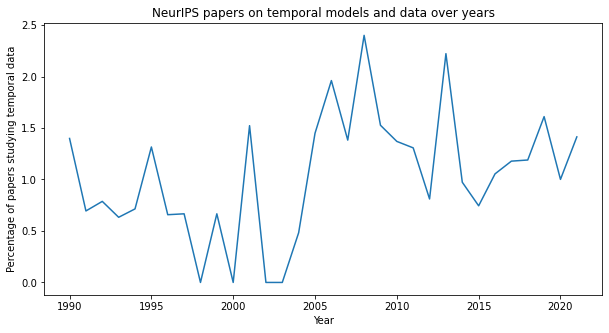

In [14]:
plt.figure(figsize=(10,5))
plt.plot(years,np.array(t_papers_count)*100/np.array(all_paper_count))
plt.xlabel('Year')
plt.ylabel('Percentage of papers studying temporal data')
plt.title("NeurIPS papers on temporal models and data over years")

## Webscapring from other journals

In [92]:
starting_url='https://sigspatial2020.sigspatial.org/accepted-papers/'

In [96]:
# Access and test the starting URL
web_page = access_url(starting_url)

# Gather all document links from the starting URL (Two Levels)
collection = web_page.find_all('p')

# # Delete the first two `li` element as they are not the paper items we need
# collection.pop(0)
# collection.pop(0)

print('Number of items collected:', len(collection))

Waiting 1 seconds to retrieve the next URL.
Successfully accessed the web page: https://sigspatial2020.sigspatial.org/accepted-papers/
Number of items collected: 94


In [97]:
web_page

<!DOCTYPE html>
<html><head>
<title>ACM SIGSPATIAL 2020 - Accepted Papers</title>
<meta content="ACM SIGSPATIAL 2020 Website" name="description"/>
<meta content="ACM SIGSPATIAL 2019 Conference" name="keywords"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="../theme/css/main.css" rel="stylesheet"/>
<link href="../theme/images/thumbs/favicon.ico" rel="shortcut icon"/>
</head>
<body>
<div id="container">
<div id="header">
<table>
<tr>
<td id="sigspatial-logo" rowspan="2"><img src="../theme/images/thumbs/acmsigspatial-full.png"/></td>
<td><img src="../theme/images/thumbs/a.jpg"/></td>
<td colspan="3" id="sigspatial-title">
        28th ACM SIGSPATIAL<br/>
        International Conference on Advances<br/>
        in Geographic Information Systems<br/>
        (ACM SIGSPATIAL 2020)<br/>
<span class="info">Tuesday November 3 - Friday November 6, 2020<br/> Seattle, Washington, USA</span>
</td>
</tr>
<tr>
<td><img src="../theme/images/thumbs/c.jpg"/></td>
<td

In [109]:
collection[0].text.strip()

'Nodeâ\x80\x93attributed Spatial Graph Partitioning \nDaniel Bereznyi (Florida Atlantic University), Ahmad Qutbuddin (Florida Atlantic University), Younggu Her (University of Florida), Kwangsoo Yang (Florida Atlantic University)'

In [116]:
years=np.arange(2007,2022,1)

collection_year=[]

key_words=[' sequen', ' time', 'temporal', 'series', 'lstm', ' change', ' online', 'evolv', 'forecast', 
           'predict', 'real-time', 'realtime']
t_papers_years=[]

t_papers_count=[]

all_paper_count=[]

plot_years=[]

for year in years:
    try:
        # Specifying the URL of desired web page to be scrapped
        starting_url ='https://sigspatial'+str(year)+'.sigspatial.org/accepted-papers/'

        # Access and test the starting URL
        web_page = access_url(starting_url)

        # Gather all document links from the starting URL (Two Levels)
        collection = web_page.find_all('p')

        # Delete the first two `li` element as they are not the paper items we need
        collection.pop(0)
        collection.pop(0)

        print('Number of items collected:', len(collection))

        collection_year.append(collection)

        titles_list=[item.text.strip() for item in collection]

        t_papers=[]

        for title in titles_list:
            if np.array([k in title for k in key_words]).any():
                t_papers.append(title)

        t_papers_years.append(t_papers)
        t_papers_count.append(len(t_papers))
        all_paper_count.append(len(collection))
        plot_years.append(year)
    except:
        pass

Waiting 1 seconds to retrieve the next URL.
The server could not be reached due to connection issues!
Waiting 1 seconds to retrieve the next URL.
The server could not be reached due to connection issues!
Waiting 1 seconds to retrieve the next URL.
The server could not be reached due to connection issues!
Waiting 1 seconds to retrieve the next URL.
The server could not be reached due to connection issues!
Waiting 1 seconds to retrieve the next URL.
The server could not be reached due to connection issues!
Waiting 1 seconds to retrieve the next URL.
The server could not be reached due to connection issues!
Waiting 1 seconds to retrieve the next URL.
Successfully accessed the web page: https://sigspatial2013.sigspatial.org/accepted-papers/
Number of items collected: 92
Waiting 1 seconds to retrieve the next URL.
Successfully accessed the web page: https://sigspatial2014.sigspatial.org/accepted-papers/
Number of items collected: 102
Waiting 1 seconds to retrieve the next URL.
Successfully 

Text(0.5, 1.0, 'ACM SIGSPATIAL papers on temporal models and data over years')

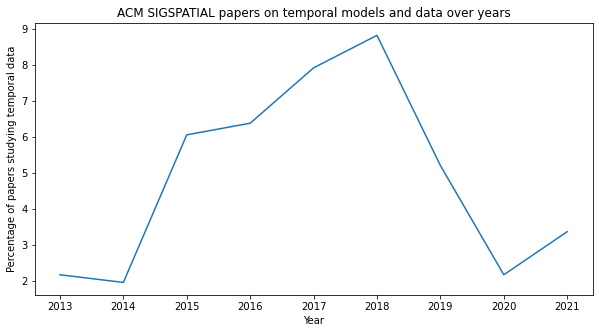

In [117]:
plt.figure(figsize=(10,5))
plt.plot(plot_years, np.array(t_papers_count)*100/np.array(all_paper_count))
plt.xlabel('Year')
plt.ylabel('Percentage of papers studying temporal data')
plt.title("ACM SIGSPATIAL papers on temporal models and data over years")

In [118]:
np.array(t_papers_count)*100/np.array(all_paper_count)

array([2.17391304, 1.96078431, 6.06060606, 6.38297872, 7.92079208,
       8.82352941, 5.20833333, 2.17391304, 3.37078652])

### AAAI

In [140]:
starting_url='https://aaai.org/Library/AAAI/aaai80contents.php'
# Access and test the starting URL
web_page = access_url(starting_url)

# Gather all document links from the starting URL (Two Levels)
collection = web_page.find_all('p')

# # Delete the first two `li` element as they are not the paper items we need
# collection.pop(0)
# collection.pop(0)

print('Number of items collected:', len(collection))


Waiting 1 seconds to retrieve the next URL.
Successfully accessed the web page: https://aaai.org/Library/AAAI/aaai80contents.php
Number of items collected: 102


[<p><i>Sponsored by the Association for the Advancement of Artificial Intelligence</i></p>,
 <p><b>Robert M. Balzer, Program Chair</b></p>,
 <p>August 18–21, 1980, Stanford, California. Published by The AAAI Press, Menlo Park, California. <a href="../../Press/Proceedings/aaai80.php">This proceedings is available in book and CD format.</a></p>,
 <p><b>Please Note:</b> Abstracts are linked to individual titles, and will appear in a separate browser window. Full-text versions of the papers are linked to the abstract text. Access to full text may be restricted to AAAI members. PDF file sizes may be large!</p>,
 <p class="left"><a href="1980/aaai80-001.php" onclick="window.open (this.href, 'child', 'height=500px,width=300px,scrollbars'); return false"> A Statistical Technique for Recovering Surface Orientation from Texture in Natural Imagery</a> / 1-3<br/> <i>Andrew P. Witkin, SRI International</i></p>,
 <p class="left"><a href="1980/aaai80-002.php" onclick="window.open (this.href, 'child',

In [151]:
titles=[item.text.split('/')[0] for item in collection[4:-3]]

In [156]:
years = ["21","20","19","18","17","16","15","14","13","12","11","10","08","07","06",
"05","04","02","00","99","98","97","96","94","93","92","91","90","88","87",
"86","84","83","82","80"]
plot_years=[2021 , 2020 , 2019 , 2018 , 2017 , 2016 , 2015 , 2014 , 2013 , 2012 , 2011 , 2010 , 2008 , 2007 , 2006 ,
2005 , 2004 , 2002 , 2000 , 1999 , 1998 , 1997 , 1996 , 1994 , 1993 , 1992 , 1991 , 1990 , 1988 , 1987 ,
1986 , 1984 , 1983 , 1982 , 1980]


collection_year=[]

key_words=[' sequen', ' time', 'temporal', 'series', 'lstm', ' change', ' online', 'evolv', 'forecast', 
           'predict', 'real-time', 'realtime']
t_papers_years=[]

t_papers_count=[]

all_paper_count=[]

plot_years=[]

for year in years:
    try:
        # Specifying the URL of desired web page to be scrapped
        starting_url ='https://aaai.org/Library/AAAI/aaai'+year+'contents.php'

        # Access and test the starting URL
        web_page = access_url(starting_url)

        # Gather all document links from the starting URL (Two Levels)
        collection = web_page.find_all('p')

        # Delete the first two `li` element as they are not the paper items we need
        collection.pop(0)
        collection.pop(0)

        print('Number of items collected:', len(collection))

        collection_year.append(collection)

        titles_list=[item.text.split('/')[0] for item in collection[4:-3]]

        t_papers=[]

        for title in titles_list:
            if np.array([k in title for k in key_words]).any():
                t_papers.append(title)

        t_papers_years.append(t_papers)
        t_papers_count.append(len(t_papers))
        all_paper_count.append(len(collection))
        plot_years.append(year)
    except:
        pass

Waiting 1 seconds to retrieve the next URL.
Successfully accessed the web page: https://aaai.org/Library/AAAI/aaai21contents.php
Number of items collected: 9
Waiting 1 seconds to retrieve the next URL.
Successfully accessed the web page: https://aaai.org/Library/AAAI/aaai20contents.php
Number of items collected: 9
Waiting 1 seconds to retrieve the next URL.
Successfully accessed the web page: https://aaai.org/Library/AAAI/aaai19contents.php
Number of items collected: 1354
Waiting 1 seconds to retrieve the next URL.
Successfully accessed the web page: https://aaai.org/Library/AAAI/aaai18contents.php
Number of items collected: 1109
Waiting 1 seconds to retrieve the next URL.
Successfully accessed the web page: https://aaai.org/Library/AAAI/aaai17contents.php
Number of items collected: 791
Waiting 1 seconds to retrieve the next URL.
Successfully accessed the web page: https://aaai.org/Library/AAAI/aaai16contents.php
Number of items collected: 696
Waiting 1 seconds to retrieve the next URL

Text(0.5, 1.0, 'AAAI papers on temporal models and data over years')

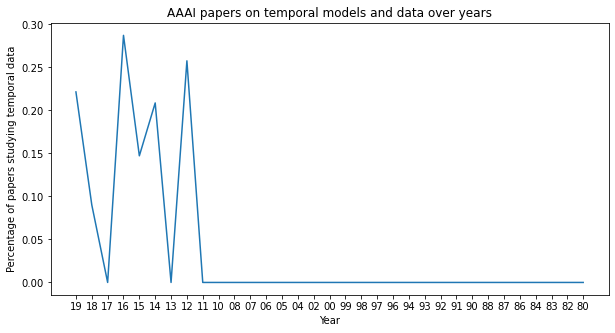

In [158]:
plt.figure(figsize=(10,5))
plt.plot(plot_years[2:], np.array(t_papers_count[2:])*100/np.array(all_paper_count[2:]))
plt.xlabel('Year')
plt.ylabel('Percentage of papers studying temporal data')
plt.title("AAAI papers on temporal models and data over years")

### KDD

In [119]:
acm_kdd=['https://dl.acm.org/doi/proceedings/10.1145/502512',
    'https://kdd.org/kdd2021/accepted-papers/toc',
         'https://dl.acm.org/conference/kdd/proceedings']
starting_url=acm_kdd[0]

In [121]:
starting_url='https://dl.acm.org/doi/proceedings/10.1145/502512'

In [132]:
# Access and test the starting URL
web_page = access_url(starting_url)

# Gather all document links from the starting URL (Two Levels)
collection = web_page.find_all('h5')

# # Delete the first two `li` element as they are not the paper items we need
collection.pop(0)
# collection.pop(0)

print('Number of items collected:', len(collection))

Waiting 1 seconds to retrieve the next URL.
Successfully accessed the web page: https://dl.acm.org/doi/proceedings/10.1145/502512
Number of items collected: 36


In [134]:
acm_kdd=['https://dl.acm.org/doi/proceedings/10.1145/502512',
        'https://dl.acm.org/doi/proceedings/10.1145/775047',
        'https://dl.acm.org/doi/proceedings/10.1145/956750',
        'https://dl.acm.org/doi/proceedings/10.1145/1281192',
        'https://dl.acm.org/doi/proceedings/10.1145/1401890',
        'https://dl.acm.org/doi/proceedings/10.1145/2339530',
        'https://dl.acm.org/doi/proceedings/10.1145/2783258',
        'https://dl.acm.org/doi/proceedings/10.1145/2939672',
        'https://dl.acm.org/doi/proceedings/10.1145/3219819',
        'https://dl.acm.org/doi/proceedings/10.1145/3292500']
years=[2001,2002,2003,2007, 2008,2012,2015,2016, 2018,2019]

In [136]:
collection_year=[]

key_words=[' sequen', ' time', 'temporal', 'series', 'lstm', ' change', ' online', 'evolv', 'forecast', 
           'predict', 'real-time', 'realtime']
t_papers_years=[]

t_papers_count=[]

all_paper_count=[]

plot_years=[]

for i,year in enumerate(years):
    try:
        # Specifying the URL of desired web page to be scrapped
        starting_url =acm_kdd[i]

        # Access and test the starting URL
        web_page = access_url(starting_url)

        # Gather all document links from the starting URL (Two Levels)
        collection = web_page.find_all('h5')

        # Delete the first two `li` element as they are not the paper items we need
        collection.pop(0)
#         collection.pop(0)

        print('Number of items collected:', len(collection))

        collection_year.append(collection)

        titles_list=[item.text.strip() for item in collection]

        t_papers=[]

        for title in titles_list:
            if np.array([k in title for k in key_words]).any():
                t_papers.append(title)

        t_papers_years.append(t_papers)
        t_papers_count.append(len(t_papers))
        all_paper_count.append(len(collection))
        plot_years.append(year)
    except:
        pass

Waiting 1 seconds to retrieve the next URL.
Successfully accessed the web page: https://dl.acm.org/doi/proceedings/10.1145/502512
Number of items collected: 36
Waiting 1 seconds to retrieve the next URL.
Successfully accessed the web page: https://dl.acm.org/doi/proceedings/10.1145/775047
Number of items collected: 7
Waiting 1 seconds to retrieve the next URL.
Successfully accessed the web page: https://dl.acm.org/doi/proceedings/10.1145/956750
Number of items collected: 6
Waiting 1 seconds to retrieve the next URL.
Successfully accessed the web page: https://dl.acm.org/doi/proceedings/10.1145/1281192
Number of items collected: 8
Waiting 1 seconds to retrieve the next URL.
Successfully accessed the web page: https://dl.acm.org/doi/proceedings/10.1145/1401890
Number of items collected: 10
Waiting 1 seconds to retrieve the next URL.
Successfully accessed the web page: https://dl.acm.org/doi/proceedings/10.1145/2339530
Number of items collected: 5
Waiting 1 seconds to retrieve the next UR

In [137]:
web_page

<!DOCTYPE html>
<html class="pb-page" data-request-id="6ce74a2a-7d08-4deb-bf06-884a61ae9fdc" lang="en"><head data-pb-dropzone="head"><meta content=";taxonomy:taxonomy:conference-collections;article:article:doi\:10.1145/3292500;wgroup:string:ACM Publication Websites;groupTopic:topic:acm-pubtype&gt;proceeding;topic:topic:conference-collections&gt;kdd;csubtype:string:Conference Proceedings;page:string:Book Page;website:website:dl-site;ctype:string:Book Content;journal:journal:acmconferences;issue:issue:doi\:10.1145/3292500;pageGroup:string:Publication Pages" name="pbContext"/>
<title>Proceedings of the 25th ACM SIGKDD International Conference on Knowledge Discovery &amp; Data Mining | ACM Conferences</title>
<meta charset="utf-8"/>
<meta content="noarchive" name="robots"/>
<meta content="Proceedings of the 25th ACM SIGKDD International Conference on Knowledge Discovery &amp; Data Mining | ACM Conferences" property="og:title"/>
<meta content="Book" property="og:type"/>
<meta content="https

In [138]:
collection

[<h5>Save to Binder</h5>,
 <h5 class="box-item__title truncate-text" data-lines="2" data-more="false">
 <a href="/profile/81100145567" title="Ankur Mukund Teredesai">Ankur Mukund Teredesai</a>
 </h5>,
 <h5 class="box-item__title truncate-text" data-lines="2" data-more="false">
 <a href="/profile/81452613746" title="Vipin  Kumar">Vipin  Kumar</a>
 </h5>,
 <h5 class="box-item__title truncate-text" data-lines="2" data-more="false">
 <a href="/profile/99659452534" title="Ying  Li">Ying  Li</a>
 </h5>,
 <h5 class="box-item__title truncate-text" data-lines="2" data-more="false">
 <a href="/profile/99659672393" title="Rómer  Rosales">Rómer  Rosales</a>
 </h5>,
 <h5 class="box-item__title truncate-text" data-lines="2" data-more="false">
 <a href="/profile/81100469792" title="Evimaria  Terzi">Evimaria  Terzi</a>
 </h5>,
 <h5 class="box-item__title truncate-text" data-lines="2" data-more="false">
 <a href="/profile/81100008465" title="George  Karypis">George  Karypis</a>
 </h5>,
 <h5 class="cook

In [69]:
# Access and test the starting URL
web_page = access_url(starting_url)

# Gather all document links from the starting URL (Two Levels)
collection = web_page.find_all('h3')

# # Delete the first two `li` element as they are not the paper items we need
# collection.pop(0)
# collection.pop(0)

print('Number of items collected:', len(collection))

Waiting 1 seconds to retrieve the next URL.
Successfully accessed the web page: https://kdd.org/kdd2021/accepted-papers/toc
Number of items collected: 482


In [70]:
titles_list=[item.a.string for item in collection]
titles_list

["Automated Mechanism Design for Strategic Classification: Abstract for KDD'21 Keynote Talk",
 'Data Science for Assembly Engineering',
 'Safe Learning in Robotics',
 'On the Nature of Data Science',
 'LawyerPAN: A Proficiency Assessment Network for Trial Lawyers',
 'Fine-Grained System Identification of Nonlinear Neural Circuits',
 'Why Attentions May Not Be Interpretable?',
 'Multi-facet Contextual Bandits: A Neural Network Perspective',
 'Partial Label Dimensionality Reduction via Confidence-Based Dependence Maximization',
 'Uplift Modeling with Generalization Guarantees',
 'Fast One-class Classification using Class Boundary-preserving Random Projections',
 'Causal Models for Real Time Bidding with Repeated User Interactions',
 'Aggregating Complex Annotations via Merging and Matching',
 'How Interpretable and Trustworthy are GAMs?',
 'Graph Deep Factors for Forecasting with Applications to Cloud Resource Allocation',
 'On Breaking Truss-Based Communities',
 'PAR-GAN: Improving the 

In [82]:
# years=np.arange(2021,2021,1)
years=[2021]

collection_year=[]

key_words=[' sequen', ' time', 'temporal', 'series', 'lstm', ' change', ' online', 'evolv', 'forecast', 
           'predict', 'real-time', 'realtime']
t_papers_years=[]

t_papers_count=[]

all_paper_count=[]

for year in years:
    # Specifying the URL of desired web page to be scrapped
    starting_url = 'https://kdd.org/kdd'+str(year)+'/accepted-papers/toc'
    website_url = "https://proceedings.neurips.cc"
    
    # Access and test the starting URL
    web_page = access_url(starting_url)

    # Gather all document links from the starting URL (Two Levels)
    collection = web_page.find_all('h3')

    # Delete the first two `li` element as they are not the paper items we need
    collection.pop(0)
    collection.pop(0)

    print('Number of items collected:', len(collection))
    
    collection_year.append(collection)
    
    titles_list=[item.a.string for item in collection]
    
    t_papers=[]
    
    for title in titles_list:
        if np.array([k in title for k in key_words]).any():
            t_papers.append(title)
        
    t_papers_years.append(t_papers)
    t_papers_count.append(len(t_papers))
    all_paper_count.append(len(collection))

Waiting 1 seconds to retrieve the next URL.
Successfully accessed the web page: https://kdd.org/kdd2021/accepted-papers/toc
Number of items collected: 480


In [80]:
np.array(t_papers_count)*100/np.array(all_paper_count)

array([1.25])

Text(0.5, 1.0, 'ACM KDD papers on temporal models and data over years')

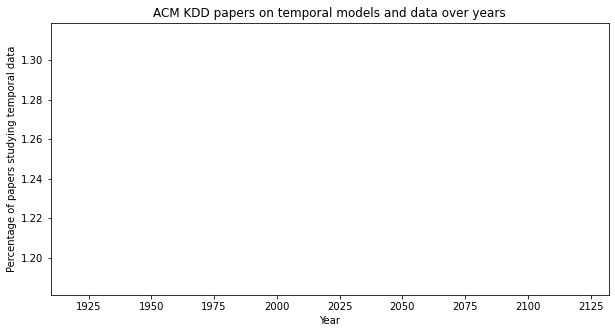

In [78]:
plt.figure(figsize=(10,5))
plt.plot(years,np.array(t_papers_count)*100/np.array(all_paper_count))
plt.xlabel('Year')
plt.ylabel('Percentage of papers studying temporal data')
plt.title("ACM KDD papers on temporal models and data over years")